In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

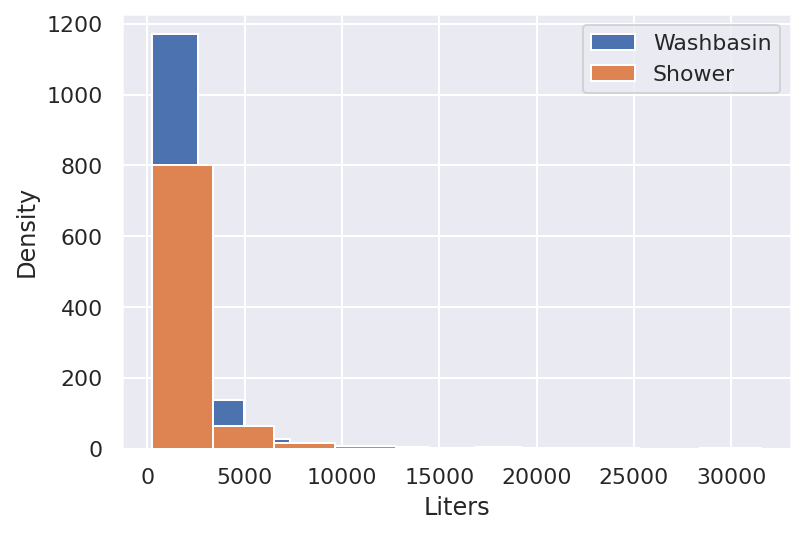

In [4]:
water_data = pd.read_csv("./data/dataset.csv", delimiter=" ")

water_data.loc[water_data["fixture"] == "washbasin", "liters"].hist(
    label="Washbasin"
)
water_data.loc[water_data["fixture"] == "kitchenfaucet", "liters"].hist(
    label="Shower"
)
plt.xlabel("Liters")
plt.ylabel("Density")
plt.legend();

In [9]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries


# Save the data about the loyal and former customers to split the dataset
wb_liters = water_data.loc[
    water_data["fixture"] == "washbasin", "liters"
].values
kit_liters = water_data.loc[
    water_data["fixture"] == "kitchenfaucet", "liters"
].values

# Set the seed for reproducibility of the results
np.random.seed(0)

# Generate the samples using bootstrapping and calculate the mean for each of them
wb_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(wb_liters, 1000)
]
kit_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(kit_liters, 1000)
]

# Print the resulting interval estimates
print(
    "Liters consumed by washbasin: mean interval", stat_intervals(wb_liters_mean_scores, 0.05)
)
print(
    "Liters consumed by kitchenfaucet: mean interval", stat_intervals(kit_liters_mean_scores, 0.05)
)

Liters consumed by washbasin: mean interval [1351.87649557 1545.79673191]
Liters consumed by kitchenfaucet: mean interval [1642.25162011 1951.77416201]
